In [28]:
import os, json, requests, math, cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
img_band1 = cv2.imread('IMG-01-ALAV2A278172850-OORIRFU_002.tif')
img_band2 = cv2.imread('IMG-02-ALAV2A278172850-OORIRFU_002.tif')
img_band3 = cv2.imread('IMG-03-ALAV2A278172850-OORIRFU_002.tif')
img_band4 = cv2.imread('IMG-04-ALAV2A278172850-OORIRFU_002.tif')

In [30]:
# 色変換
TYPE_RED = 1
TYPE_GLEEN = 2
TYPE_BLUE = 3

def img_change_color(img,colortype):
    
    temp_img = cv2.split(img)
    
    # ゼロ埋めの画像配列
    if len(img.shape) == 3:
        height, width, channels = img.shape[:3]
    else:
        height, width = img.shape[:2]
        channels = 1
    zeros = np.zeros((height, width), img.dtype)
    # 色の指定
    if colortype == TYPE_RED:
        return cv2.merge((temp_img[1],zeros,zeros))
    elif colortype == TYPE_GLEEN:
        return cv2.merge((zeros,temp_img[1],zeros))
    else:
        return cv2.merge((zeros,zeros,temp_img[1]))

In [31]:
img_blue = img_change_color(img_band4,TYPE_BLUE)
img_gleen = img_change_color(img_band3,TYPE_GLEEN)
img_red = img_change_color(img_band2,TYPE_RED)

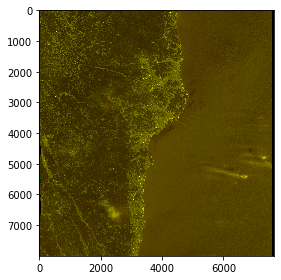

In [32]:
rg = cv2.addWeighted(img_red,1,img_gleen,1,0)
io.imshow(rg)

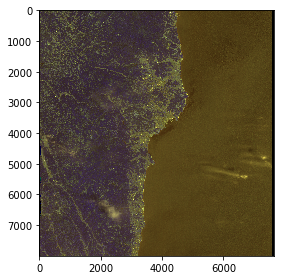

In [33]:
rgb_1 = cv2.addWeighted(rg,1,img_blue,1,0)
io.imshow(rgb_1)